In [1]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

preprocessing data

In [2]:
nlp = spacy.load("en")

In [5]:
# def clean(text):
#     return unicode(''.join([i if ord(i) < 128 else ' ' for i in text]))

In [3]:
my_stop_words = [u'say', u'\'s', u'Mr', u'be', u'said', u'says', u'saying']

for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [4]:
mypath = '/home/scarlet/Projects/Data Science/Data/Short Stories/'

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for itm in onlyfiles:
    file = open('/home/scarlet/Projects/Data Science/Data/Short Stories/' + itm, 'rb')
    print(len(file.read()))
    
    
docs = []

for itm in onlyfiles:
    file = open('/home/scarlet/Projects/Data Science/Data/Short Stories/' + itm, 'rb')
#     print(len(file.read()))
    
    docs.append(str((file.read())))
    
print("Done!")

len(docs)

43039
12660
5535
12996
34851
18579
19623
86787
52311
20059
28087
15812
13153
83510
20532
22012
13594
Done!


17

In [12]:
# doc = nlp(docs)

In [11]:
def concatenate_list_data(list):
    result= ''
    for element in list:
        result += str(element) + " "
    return result

print(concatenate_list_data([1, 5, 12, 2]))

1 5 12 2 


In [15]:
docs_2 = docs[0] + '\n' + docs[1] + '\n' + docs[2]

In [19]:
docs_3 = concatenate_list_data(docs)

In [20]:
len(docs_3)

520606

In [22]:
43039 +12660 +5535 +12996 +34851 +18579 +19623 +86787 +52311 +20059 +28087 +15812 +13153 +83510 +20532 +22012 +13594 

503140

In [23]:
520606 - 503140

17466

In [25]:
doc = nlp(docs_3)

MemoryError: 

In [26]:
doc = nlp(docs_2)

In [31]:
type(doc)

spacy.tokens.doc.Doc

In [34]:
doc[1].text

'used'

In [35]:
# we add some words to the stop word list
texts, article = [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        texts.append(article)
        article = []

In [36]:
texts

[["b'i",
  'thrift',
  'store',
  'friend',
  'we\\x92d',
  'train',
  'boston',
  'the',
  'garment',
  'district',
  'huge',
  'vintage',
  'clothing',
  'warehouse',
  'everything',
  'arrange',
  'color',
  'make',
  'clothe',
  'beautiful',
  'it\\x92',
  'kind',
  'like',
  'go',
  'wardrobe',
  'narnia',
  'book',
  'instead',
  'find',
  'aslan',
  'white',
  'witch',
  'horrible',
  'eustace',
  'find',
  'magic',
  'clothing',
  'world\\x96instead',
  'talk',
  'animal',
  'feather',
  'boas',
  'wedding',
  'dress',
  'bowling',
  'shoe',
  'paisley',
  'shirt',
  'doc',
  'martens',
  'hang',
  'rack',
  'black',
  'dress',
  'like',
  'world\\x92s',
  'large',
  'indoor',
  'funeral',
  'blue',
  'dresses\\x96all',
  'blue',
  'imagine\\x96and',
  'red',
  'dress',
  'pink',
  'red',
  'orangey',
  'red',
  'purple',
  'red',
  'exit',
  'light',
  'red',
  'candy',
  'red',
  'sometimes',
  '-PRON-',
  'close',
  'eye',
  'natasha',
  'natalie',
  'jake',
  'drag',
  'rac

bigrams

In [37]:
bigram = gensim.models.Phrases(texts)

In [38]:
texts = [bigram[line] for line in texts]

In [40]:
len(texts)

2

In [41]:
texts

[["b'i",
  'thrift',
  'store',
  'friend',
  'we\\x92d',
  'train',
  'boston',
  'the',
  'garment',
  'district',
  'huge',
  'vintage',
  'clothing',
  'warehouse',
  'everything',
  'arrange',
  'color',
  'make',
  'clothe',
  'beautiful',
  'it\\x92',
  'kind',
  'like',
  'go',
  'wardrobe',
  'narnia',
  'book',
  'instead',
  'find',
  'aslan',
  'white',
  'witch',
  'horrible',
  'eustace',
  'find',
  'magic',
  'clothing',
  'world\\x96instead',
  'talk',
  'animal',
  'feather',
  'boas',
  'wedding',
  'dress',
  'bowling',
  'shoe',
  'paisley',
  'shirt',
  'doc',
  'martens',
  'hang',
  'rack',
  'black',
  'dress',
  'like',
  'world\\x92s',
  'large',
  'indoor',
  'funeral',
  'blue',
  'dresses\\x96all',
  'blue',
  'imagine\\x96and',
  'red',
  'dress',
  'pink',
  'red',
  'orangey',
  'red',
  'purple',
  'red',
  'exit',
  'light',
  'red',
  'candy',
  'red',
  'sometimes',
  '-PRON-',
  'close',
  'eye',
  'natasha',
  'natalie',
  'jake',
  'drag',
  'rac

In [42]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [44]:
corpus[1]

[(0, 40),
 (32, 1),
 (36, 1),
 (61, 1),
 (70, 2),
 (85, 1),
 (89, 2),
 (97, 1),
 (98, 1),
 (101, 1),
 (109, 1),
 (116, 1),
 (120, 1),
 (121, 2),
 (122, 2),
 (128, 4),
 (132, 2),
 (138, 2),
 (159, 1),
 (161, 2),
 (164, 1),
 (181, 2),
 (182, 1),
 (184, 1),
 (191, 2),
 (200, 1),
 (203, 2),
 (204, 1),
 (205, 2),
 (209, 2),
 (212, 1),
 (214, 1),
 (218, 1),
 (222, 1),
 (223, 3),
 (227, 1),
 (246, 4),
 (258, 1),
 (261, 1),
 (272, 5),
 (291, 1),
 (303, 1),
 (320, 2),
 (325, 2),
 (332, 1),
 (359, 1),
 (368, 1),
 (374, 1),
 (390, 1),
 (399, 1),
 (402, 1),
 (404, 1),
 (409, 1),
 (411, 1),
 (413, 1),
 (418, 1),
 (425, 3),
 (434, 1),
 (441, 1),
 (446, 1),
 (455, 1),
 (458, 1),
 (466, 1),
 (470, 1),
 (471, 1),
 (472, 1),
 (478, 4),
 (479, 1),
 (482, 1),
 (500, 2),
 (502, 1),
 (503, 3),
 (505, 3),
 (507, 6),
 (518, 1),
 (520, 1),
 (523, 1),
 (524, 1),
 (531, 2),
 (535, 5),
 (545, 2),
 (546, 1),
 (550, 1),
 (555, 1),
 (562, 3),
 (564, 2),
 (565, 4),
 (573, 1),
 (575, 2),
 (583, 2),
 (586, 1),
 (591, 2

LSI

In [45]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [46]:
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics

[(0,
  '0.856*"-PRON-" + 0.184*"zofia" + 0.143*"jake" + 0.138*"go" + 0.113*"handbag" + 0.105*"come" + 0.097*"like" + 0.094*"tell" + 0.089*"look" + 0.081*"know"'),
 (1,
  '0.187*"zofia" + -0.178*"time" + -0.172*"old" + -0.170*"the" + 0.146*"jake" + -0.141*"husband" + -0.140*"boy" + -0.117*"present" + 0.115*"handbag" + -0.115*"room"')]

HDP

In [47]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [48]:
hdpmodel.show_topics()

[(0,
  '0.085*-PRON- + 0.018*zofia + 0.014*jake + 0.014*go + 0.011*handbag + 0.010*come + 0.010*like + 0.009*tell + 0.009*look + 0.008*know + 0.008*think + 0.007*mother + 0.006*the + 0.006*get + 0.006*good + 0.006*way + 0.006*t + 0.006*time + 0.005*don\\x92_t + 0.005*didn\\x92_t'),
 (1,
  '0.034*-PRON- + 0.008*time + 0.008*the + 0.008*old + 0.006*husband + 0.005*go + 0.005*boy + 0.004*present + 0.004*hand + 0.004*long + 0.004*come + 0.004*year + 0.004*room + 0.004*man + 0.004*life + 0.004*child + 0.003*little + 0.003*foot + 0.003*world + 0.003*doctor'),
 (2,
  '0.005*flat + 0.004*khan?\\x94\\r\\n\\r\\ni + 0.003*shelter + 0.003*volubility + 0.003*week + 0.003*delicious + 0.003*world + 0.003*mouth + 0.003*offend + 0.003*office + 0.003*lyncher + 0.003*face + 0.002*tree + 0.002*counteract + 0.002*lie + 0.002*whom + 0.002*hardly + 0.002*hum + 0.002*camera + 0.002*foot'),
 (3,
  '0.004*he\\x92d + 0.004*hopelessly + 0.003*cancerous + 0.003*marriage + 0.003*toothlessly + 0.003*want + 0.002*kni

LDA

In [49]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [50]:
ldamodel.show_topics()

[(0,
  '0.040*"-PRON-" + 0.011*"zofia" + 0.010*"go" + 0.009*"jake" + 0.007*"come" + 0.006*"like" + 0.006*"look" + 0.005*"tell" + 0.004*"handbag" + 0.004*"the"'),
 (1,
  '0.027*"-PRON-" + 0.005*"zofia" + 0.004*"go" + 0.004*"come" + 0.004*"jake" + 0.003*"tell" + 0.003*"time" + 0.003*"handbag" + 0.003*"old" + 0.003*"know"'),
 (2,
  '0.069*"-PRON-" + 0.012*"zofia" + 0.011*"handbag" + 0.010*"go" + 0.008*"like" + 0.008*"come" + 0.007*"know" + 0.007*"jake" + 0.006*"look" + 0.006*"think"'),
 (3,
  '0.028*"-PRON-" + 0.007*"go" + 0.006*"look" + 0.006*"zofia" + 0.005*"jake" + 0.005*"like" + 0.004*"tell" + 0.004*"come" + 0.004*"the" + 0.004*"time"'),
 (4,
  '0.069*"-PRON-" + 0.013*"zofia" + 0.011*"go" + 0.009*"jake" + 0.008*"come" + 0.008*"tell" + 0.007*"look" + 0.007*"know" + 0.006*"the" + 0.006*"handbag"'),
 (5,
  '0.048*"-PRON-" + 0.013*"zofia" + 0.011*"jake" + 0.009*"go" + 0.009*"like" + 0.008*"handbag" + 0.007*"mother" + 0.007*"come" + 0.007*"tell" + 0.006*"time"'),
 (6,
  '0.038*"-PRON-" + 0

pyLDAvis

In [51]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
8      78.060745        1       1 -0.022759 -0.000187
6      14.504756        1       2  0.017556 -0.005405
4       7.406140        1       3 -0.010422 -0.004531
2       0.004053        1       4 -0.015437  0.002872
5       0.004053        1       5 -0.005214 -0.000179
9       0.004053        1       6  0.001348 -0.001587
0       0.004052        1       7  0.001324  0.000957
7       0.004052        1       8 -0.001160  0.003474
3       0.004052        1       9  0.014035  0.000502
1       0.004052        1      10  0.020728  0.004086, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
1010  Default  338.000000       -PRON-  338.000000  30.0000  30.0000
780   Default   67.000000        zofia   67.000000  29.0000  29.0000
1332  Default   50.000000         jake   50.000000  28.0000  28.0000
1368  Default   45.000000           go   45.000000  27.0000  27.0000
1117  Default   42.000000      handbag   42.000000  26.0000  26.0000
781   Default   39.000000         come   39.000000  25.0000  25.0000
382   Default   31.000000         like   31.000000  24.0000  24.0000
636   Default   34.000000         look   34.000000  23.0000  23.0000
626   Default   31.000000         tell   31.000000  22.0000  22.0000
1641  Default   32.000000          the   32.000000  21.0000  21.0000
508   Default   29.000000         know   29.000000  20.0000  20.0000
1691  Default   26.000000        think   26.000000  19.0000  19.0000
601   Default   26.000000         time   26.000000  18.0000  18.0000
671   Default   23.000000            t   23.000000  17.0000  17.0000
1304  Default   20.000000       mother   20.000000  16.0000  16.0000
117   Default   20.000000         good   20.000000  15.0000  15.0000
1335  Default   19.000000          way   19.000000  14.0000  14.0000
1051  Default   18.000000   didn\x92_t   18.000000  13.0000  13.0000
1668  Default   19.000000        maybe   19.000000  12.0000  12.0000
27    Default   18.000000         year   18.000000  11.0000  11.0000
1058  Default   18.000000          old   18.000000  10.0000  10.0000
205   Default   17.000000          get   17.000000   9.0000   9.0000
1632  Default   17.000000    don\x92_t   17.000000   8.0000   8.0000
1382  Default   16.000000        right   16.000000   7.0000   7.0000
164   Default   15.000000          but   15.000000   6.0000   6.0000
991   Default   15.000000         want   15.000000   5.0000   5.0000
116   Default   15.000000        thing   15.000000   4.0000   4.0000
38    Default   15.000000       little   15.000000   3.0000   3.0000
93    Default   13.000000         word   13.000000   2.0000   2.0000
1042  Default   13.000000   zofia\x92s   13.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
205   Topic10    0.000495          get   17.795956  -0.3763  -6.0011
626   Topic10    0.000677         tell   31.689791  -0.6400  -5.6877
1368  Topic10    0.000822           go   45.160683  -0.8008  -5.4942
693   Topic10    0.000297          man    7.315481   0.0022  -6.5115
780   Topic10    0.001006        zofia   67.873024  -1.0059  -5.2920
701   Topic10    0.000168    telephone    2.642226   0.4502  -7.0818
98    Topic10    0.000316         home    8.536057  -0.0904  -6.4498
991   Topic10    0.000427         want   15.099037  -0.3589  -6.1480
1691  Topic10    0.000575        think   26.894615  -0.6399  -5.8516
879   Topic10    0.000339        house    9.966044  -0.1763  -6.3808
27    Topic10    0.000460         year   18.421494  -0.4835  -6.0737
508   Topic10    0.000583         know   29.496548  -0.7187  -5.8381
539   Topic10    0.000317         turn    9.018434  -0.1420  -6.4464
1332  Topic10    0.000739         jake   50.400539  -1.0163  -5.6000
1620  Topic10    0.000292          sit    8.063556  -0.1115  -6.52

Topic Coherence

In [52]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [53]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [54]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

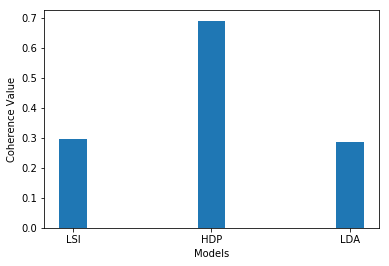

In [56]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])